
# SVM (支持向量机)

## 简介

支持向量机（Support Vector Machine, SVM）是一种二分类模型，其基本思想是寻找一个最优超平面，使其能够最大间隔地将样本划分为两类。


---

##  一、问题设定

给定训练数据集：

$$
\{(x_1, y_1), (x_2, y_2), \dots, (x_n, y_n)\}, \quad x_i \in \mathbb{R}^d, \; y_i \in \{+1, -1\}
$$

我们希望找到一个超平面：

$$
w^T x + b = 0
$$

使得两类样本被正确分类，并且**间隔最大**。

---

##  二、分类条件与函数间隔

定义每个样本的 **函数间隔（Functional Margin）** 为：

$$
\hat{\gamma}_i = y_i (w^T x_i + b)
$$

为了确保分类正确，要求：

$$
\hat{\gamma}_i > 0
$$

进一步，若要保证有一定的“安全距离”(条件)，可以设：

$$
y_i (w^T x_i + b) \geq \hat{\gamma}, \quad \text{其中 } \hat{\gamma} > 0
$$

---

##  三、几何间隔

**几何间隔（Geometric Margin）** 是函数间隔除以 $ \|w\| $，即：

$$
\gamma_i = \frac{\hat{\gamma}_i}{\|w\|}
$$

因此，所有样本中最小的几何间隔是：

$$
\gamma = \min_i \frac{y_i(w^T x_i + b)}{\|w\|}
$$

我们希望最大化这个最小值：

$$
\max_{w, b} \left( \min_i \frac{y_i(w^T x_i + b)}{\|w\|} \right)
$$

---

##  四、优化问题简化

由于 $ w $ 和 $ b $ 的尺度不影响几何间隔（因为分子和分母都乘了相同的因子），我们可以固定函数间隔为 1，即令：

$$
y_i(w^T x_i + b) \geq 1
$$

此时，几何间隔变为：

$$
\gamma = \frac{1}{\|w\|}
$$

最大化几何间隔等价于最小化 $ \|w\| $，最终得到：

$$
\begin{aligned}
& \min_{w, b} & \frac{1}{2} \|w\|^2 \\
& \text{s.t.} & y_i(w^T x_i + b) \geq 1, \quad i = 1, \dots, n
\end{aligned}
$$

这是**硬间隔 SVM 的原始优化问题**。

---

##  五、拉格朗日对偶推导

构造拉格朗日函数：

$$
\mathcal{L}(w, b, \alpha) = \frac{1}{2} \|w\|^2 - \sum_{i=1}^n \alpha_i [y_i(w^T x_i + b) - 1]
$$

对 $ w $ 和 $ b $ 求偏导并令其为零：

$$
\frac{\partial \mathcal{L}}{\partial w} = w - \sum_{i=1}^n \alpha_i y_i x_i = 0 \Rightarrow w = \sum_{i=1}^n \alpha_i y_i x_i
$$

$$
\frac{\partial \mathcal{L}}{\partial b} = -\sum_{i=1}^n \alpha_i y_i = 0 \Rightarrow \sum_{i=1}^n \alpha_i y_i = 0
$$

将这两个结果代入拉格朗日函数中，得到对偶形式：

$$
\mathcal{L}(\alpha) = \sum_{i=1}^n \alpha_i - \frac{1}{2} \sum_{i,j=1}^n \alpha_i \alpha_j y_i y_j x_i^T x_j
$$

---

##  六、SVM 对偶优化问题

最终的对偶问题是：

$$
\begin{aligned}
& \max_{\alpha} & \sum_{i=1}^n \alpha_i - \frac{1}{2} \sum_{i,j=1}^n \alpha_i \alpha_j y_i y_j x_i^T x_j \\
& \text{s.t.} & \alpha_i \geq 0, \quad \sum_{i=1}^n \alpha_i y_i = 0
\end{aligned}
$$

---

##  七、决策函数

最优解 $ \alpha_i $ 中只有部分非零（对应支持向量），最终的分类器为：

$$
f(x) = w^T x + b = \sum_{i=1}^n \alpha_i y_i x_i^T x + b
$$

也可以写成核函数的形式（引入核技巧）：

$$
f(x) = \sum_{i=1}^n \alpha_i y_i K(x_i, x) + b
$$

---

##  八、软间隔 SVM（可选扩展）

如果数据不是线性可分的，可以引入松弛变量 $ \xi_i \geq 0 $，允许某些样本违反约束：

$$
y_i(w^T x_i + b) \geq 1 - \xi_i
$$

目标函数改为：

$$
\min_{w, b, \xi} \frac{1}{2} \|w\|^2 + C \sum_{i=1}^n \xi_i
$$

其中 $ C > 0 $ 是惩罚系数，控制对误分类的容忍度。

---


# SMO（序列最小优化）

SMO（Sequential Minimal Optimization）是 John C. Platt 提出的用于高效求解上述 SVM 对偶问题的算法。其基本思想是每次选择两个变量 $\alpha_i$ 和 $\alpha_j$ 进行优化，其余变量保持不变。

---

## SMO 公式推导

你的公式是正确的，但为了确保完整性和清晰性，我们可以进一步整理和解释每一步的推导过程。以下是对你提供的目标函数 $ W_{1,2}(\alpha_1, \alpha_2) $ 的详细分析和推导。

---

### **一、目标函数的原始形式**

SVM 的对偶问题中，目标函数为：

$$
W(\boldsymbol{\alpha}) = \sum_{i=1}^m \alpha_i - \frac{1}{2} \sum_{i=1}^m \sum_{j=1}^m y_i y_j \alpha_i \alpha_j K(\mathbf{x}_i, \mathbf{x}_j)
$$

在 SMO 中，我们每次只优化两个变量 $\alpha_1$ 和 $\alpha_2$，其余变量固定。因此，目标函数可以写为：

$$
W_{1,2}(\alpha_1, \alpha_2) = \alpha_1 + \alpha_2 - \frac{1}{2} \left( \alpha_1^2 K_{11} + \alpha_2^2 K_{22} + 2 \alpha_1 \alpha_2 K_{12} \right) - y_1 \alpha_1 \sum_{i=3}^m \alpha_i y_i K_{1i} - y_2 \alpha_2 \sum_{i=3}^m \alpha_i y_i K_{2i} + A_0
$$

其中：
- $K_{1i} = K(\mathbf{x}_1, \mathbf{x}_i)$，
- $K_{2i} = K(\mathbf{x}_2, \mathbf{x}_i)$，
- $A_0$ 是与 $\alpha_1$ 和 $\alpha_2$ 无关的常数。

---

### **二、目标函数的简化**

#### 1. 分析约束条件
根据 SVM 的对偶问题约束：

$$
\alpha_1 y_1 + \alpha_2 y_2 = -\sum_{i=3}^m \alpha_i y_i = \zeta
$$

其中 $\zeta$ 是一个常数。

从这个约束中，可以表示 $\alpha_2$ 为：

$$
\alpha_2 = \frac{\zeta - \alpha_1 y_1}{y_2}
$$

#### 2. 将 $\alpha_2$ 表达式代入目标函数
将 $\alpha_2 = \frac{\zeta - \alpha_1 y_1}{y_2}$ 代入目标函数 $W_{1,2}(\alpha_1, \alpha_2)$，得到关于 $\alpha_1$ 的单变量函数：

$$
W_{1,2}(\alpha_1, \alpha_2) = W_1(\alpha_1)
$$

#### 3. 展开目标函数
展开目标函数：

$$
W_{1,2}(\alpha_1, \alpha_2) = \alpha_1 + \alpha_2 - \frac{1}{2} \left( \alpha_1^2 K_{11} + \alpha_2^2 K_{22} + 2 \alpha_1 \alpha_2 K_{12} \right) - y_1 \alpha_1 \sum_{i=3}^m \alpha_i y_i K_{1i} - y_2 \alpha_2 \sum_{i=3}^m \alpha_i y_i K_{2i} + A_0
$$

代入 $\alpha_2 = \frac{\zeta - \alpha_1 y_1}{y_2}$ 后，目标函数变为：

$$
W_1(\alpha_1) = \alpha_1 + \frac{\zeta - \alpha_1 y_1}{y_2} - \frac{1}{2} \left( \alpha_1^2 K_{11} + \left( \frac{\zeta - \alpha_1 y_1}{y_2} \right)^2 K_{22} + 2 \alpha_1 \cdot \frac{\zeta - \alpha_1 y_1}{y_2} K_{12} \right) - y_1 \alpha_1 \sum_{i=3}^m \alpha_i y_i K_{1i} - y_2 \cdot \frac{\zeta - \alpha_1 y_1}{y_2} \sum_{i=3}^m \alpha_i y_i K_{2i} + A_0
$$

化简后，目标函数可以写为：

$$
W_1(\alpha_1) = p \alpha_1^2 + q \alpha_1 + A_1
$$

其中：
- $p = -\frac{1}{2} (K_{11} + K_{22} - 2K_{12})$，
- $q = y_1 - y_2 + (K_{22} - K_{12}) \zeta + \sum_{i=3}^m y_i \alpha_i (K_{2i} - K_{1i})$，
- $A_1$ 是与 $\alpha_1$ 无关的常数。

---


##  **第三步：裁剪 $\alpha_2^{new}$（Clipping**

在上一步中，我们得到了新的 $\alpha_2^{new}$：

$$
\alpha_2^{new} = \alpha_2^{old} + \frac{y_2 (E_1 - E_2)}{\eta}
$$

其中：
- $E_i = g(x_i) - y_i$ 是预测值与真实标签的误差；

$$
g(x) = \sum_{i=1}^m \alpha_i y_i K(x_i, x) + b
$$
- $\eta = K_{11} + K_{22} - 2K_{12}$；
- $K_{ij} = K(x_i, x_j)$ 是核函数。

但是这个新值可能不满足 SVM 的两个约束条件：

1. $0 \leq \alpha_i \leq C$
2. $\alpha_1 y_1 + \alpha_2 y_2 = \zeta$

因此我们需要对 $\alpha_2^{new}$ 进行裁剪（clip），使其落在合法区间内。


####  裁剪边界 L 和 U 的计算

根据 $y_1$ 和 $y_2$ 是否相同，L 和 U 的定义不同：

#### 情况一：$y_1 == y_2$

此时约束为：
$$
\alpha_1 + \alpha_2 = \frac{\zeta}{y_1}
$$

所以 $\alpha_2$ 的上下界为：

$$
L = \max\left(0,\ \frac{\zeta}{y_1} - C\right), \quad
U = \min\left(C,\ \frac{\zeta}{y_1}\right)
$$

#### 情况二：$y_1 != y_2$

此时约束为：
$$
\alpha_1 - \alpha_2 = \frac{\zeta}{y_1}
$$

所以 $\alpha_2$ 的上下界为：

$$
L = \max\left(0,\ -\frac{\zeta}{y_1}\right), \quad
U = \min\left(C,\ C - \frac{\zeta}{y_1}\right)
$$

---

###  最终裁剪操作

将 $\alpha_2^{new}$ 裁剪到 $[L, U]$ 区间内：

$$
\alpha_2^{new\_clipped} = \begin{cases}
L & \text{if } \alpha_2^{new} < L \\
U & \text{if } \alpha_2^{new} > U \\
\alpha_2^{new} & \text{otherwise}
\end{cases}
$$

---

##  **第四步：更新 $\alpha_1^{new}$**

根据约束关系：

$$
\alpha_1 y_1 + \alpha_2 y_2 = \zeta
\Rightarrow \alpha_1 = \frac{\zeta - \alpha_2 y_2}{y_1}
$$

代入裁剪后的 $\alpha_2^{new\_clipped}$ 得到：

$$
\alpha_1^{new} = \alpha_1^{old} + y_1 y_2 (\alpha_2^{old} - \alpha_2^{new\_clipped})
$$

---

##  **第五步：更新偏置项 $b$**

使用支持向量的性质来更新偏置项 $b$。根据决策函数：

$$
g(x_i) = \sum_{j=1}^m \alpha_j y_j K(x_j, x_i) + b
$$

对于支持向量 $(x_i, y_i)$，有 $g(x_i) = y_i$，因此可以解出：

$$
b_i = y_i - \sum_{j=1}^m \alpha_j y_j K(x_j, x_i)
$$

我们通常取所有支持向量对应的 $b_i$ 的平均值作为最终的 $b$：

$$
b = \frac{1}{|\mathcal{S}|} \sum_{i \in \mathcal{S}} b_i
$$

其中 $\mathcal{S} = \{ i \mid \alpha_i > 0 \}$ 是支持向量集合。

---




## 为什么$ w $ 和 $ b $ 的尺度不影响几何间隔？

### 原因：


#### 第一步：理解几何间隔与函数间隔的关系
几何间隔 $ \gamma_i $ 是通过将函数间隔 $ \hat{\gamma}_i $ 归一化得到的：
$$
\gamma_i = \frac{\hat{\gamma}_i}{\|w\|}
$$

这意味着，对于一个特定的超平面 $ w^T x + b = 0 $，如果我们将 $ w $ 和 $ b $ 同时乘以一个标量 $ \lambda > 0 $，那么：
- 函数间隔 $ \hat{\gamma}_i $ 会变为 $ \lambda \cdot \hat{\gamma}_i $
- 而几何间隔 $ \gamma_i $ 保持不变，因为分母 $ \|w\| $ 也会变为 $ \lambda \cdot \|w\| $：
  $$
  \gamma_i = \frac{\lambda \cdot \hat{\gamma}_i}{\lambda \cdot \|w\|} = \frac{\hat{\gamma}_i}{\|w\|}
  $$

因此，$ w $ 和 $ b $ 的尺度不会影响几何间隔，但会影响函数间隔。

也就相当于上下多$*$了一个系数，而优化$w$ 不需要考虑这个系数

---


## 基于支持向量机的简单线性点分类问题

### 导包

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from tqdm import tqdm,trange

### 数据处理

数据集大小: 200


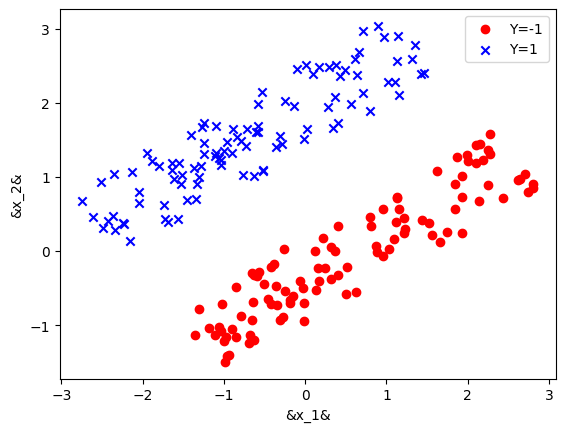

In [ ]:
data=np.loadtxt('linear.csv',delimiter=',')
print("数据集大小:",len(data))


x=data[:,:2]
y=data[:,2]


#数据集可视化
plt.figure()
plt.scatter(x[y==-1,0],x[y==-1,1],color='red',label='Y=-1')
plt.scatter(x[y==1,0],x[y==1,1],color='blue',marker='x',label='Y=1')
plt.xlabel(r'&x_1&')
plt.ylabel(r'&x_2&')
plt.legend()
plt.show()


### SMO
#### 参数
  - x,y 样本的值和类别
  - ker 核函数，与线性回归中的核函数的含义相同
  - C惩罚系数
  - nax_iter 迭代次数

In [ ]:
def SMO(x,y,ker,C,max_iter):
    
    m=x.shape[0]
    alpha=np.zeros(m)
    #我们先把每一个向量的内积先计算出来
    K=np.zeros((m,m))
    for i in range(m):
        for j in range(m):
            K[i,j]=ker(x[i],x[j])
    
    #开始迭代
    for l in trange(max_iter):  #trange是tqdm的功能，相当于range加了一个进度条的功能
        for i in range(m):
            #先固定 i 然后随机一个j出来，并且保证 i!=j
            j=np.random.choice([l for l in range(m) if l!=i])

            #用 -q/2p代替alpha_i的值   简化版
            eta=K[i,i]+K[j,j]-2*K[i,j]
            e_i=np.sum(y*alpha*K[:,i])-y[i]  #这个就是简化公式中的 g(x_i)-y_i  #矩阵之间的*表示逐元素相乘
            e_j=np.sum(y*alpha*K[:,j])-y[j]  # g(x_j)-y_j
            #更新alpha_i
            alpha_i=alpha[i]+y[i]*(e_j-e_i)/(eta+1e-5)  # 防止除以0  
            zeta=alpha[i]*y[i]+alpha[j]*y[j]  #这个就是限制条件  

            #将alpha_i和对应的alpha_j保持在[0,C]区间
            # alpha_i=(zeta - y_j * alpha_j)/y_i
            # alpha_j=(zeta - y_i * alpha_i)/y_j
            #0 <= (zeta - y_j * alpha_j) / y_i <= C
            if y[i]==y[j]:                 #即zeta/y[i]=alpha_i+alpha_j
                lower=max(0,zeta/y[i]-C)     #不能小到导致 alpha_j>C，
                upper=min(C,zeta/y[i])       #不能大到导致 alpha_j<0
            else:                          #即zeta/y[i]=alpha_i-alpha_j
                lower=max(0,zeta/y[i])       
                upper=min(C,zeta/y[i]+C)
            #更新alpha_i,alpha_j    
            alpha_i=np.clip(alpha_i,lower,upper)  #将数组中的每个元素限制在指定的范围 [a_min, a_max] 内，超出范围的会被“裁剪”掉。 如果是单个数字，就取边界值 
            alpha_j=(zeta-y[i]*alpha_i)/y[j]

            #更新alpha
            alpha[i],alpha[j]=alpha_i,alpha_j

    return alpha

## 上下界的确定

###  情况一：`y[i] == y[j]`

1. **满足原始约束：**
   $$
   0 \leq \alpha_i, \alpha_j \leq C
   $$

2. **满足线性等式约束（由 SVM 对偶问题导出）：**
   $$
   \alpha_i y_i + \alpha_j y_j = \zeta
   $$

其中：
- $\zeta = -\sum_{k \ne i,j} \alpha_k y_k$ 是一个常数（其他 $\alpha$ 固定）
- $y_i, y_j \in \{+1, -1\}$ 是样本标签

#### y[i] == y[j]

这意味着两个样本属于同一类（同为 +1 或 -1）。根据约束：

$$
\alpha_i y_i + \alpha_j y_j = \zeta \Rightarrow \alpha_i + \alpha_j = \frac{\zeta}{y_i}
$$

因为 $y_i = y_j$，所以两边都除以 $y_i$ 得到：

$$
\alpha_i + \alpha_j = \frac{\zeta}{y_i}
$$

又因为我们只更新 $\alpha_j$，$\alpha_i$ 可表示为：

$$
\alpha_i = \frac{\zeta}{y_i} - \alpha_j
$$

要保证 $\alpha_i \in [0, C]$，即：

$$
0 \leq \frac{\zeta}{y_i} - \alpha_j \leq C
$$

整理得：

$$
\frac{\zeta}{y_i} - C \leq \alpha_j \leq \frac{\zeta}{y_i}
$$

但同时还要满足 $\alpha_j \in [0, C]$，所以最终上下界是：

$$
\begin{aligned}
L &= \max(0, \frac{\zeta}{y_i} - C) \\
U &= \min(C, \frac{\zeta}{y_i})
\end{aligned}
$$




In [ ]:
# 设置超参数
C = 1e8 # 由于数据集完全线性可分，我们不引入松弛变量
max_iter = 1000
np.random.seed(0)

alpha = SMO(x, y, ker=np.inner, C=C, max_iter=max_iter)

100%|██████████| 1000/1000 [00:07<00:00, 140.80it/s]


## 在支持向量机（SVM）中，**拉格朗日乘子 $\alpha_i \ne 0$ 的训练样本被称为“支持向量”（Support Vectors）**。

---

###  直观理解：$\alpha_i \ne 0$ 意味着什么？

在 SVM 的对偶优化问题中，我们通过拉格朗日乘子 $\alpha_i$ 来控制每个样本的约束：

$$
y_i(w^T x_i + b) \geq 1
$$

只有当某个样本 **恰好落在间隔边界上或被误分类时**，对应的 $\alpha_i > 0$。也就是说：

> **非零的 $\alpha_i$ 表示该样本对最终决策超平面（分类器）有直接影响。**

---

###  支持向量的作用

1. **决定分类器参数 $w$ 和 $b$**
   $$
   w = \sum_{i=1}^n \alpha_i y_i x_i
   $$

   只有 $\alpha_i \ne 0$ 的样本才对 $w$ 有贡献。

2. **影响分类边界**
   支持向量决定了最终的分类超平面的位置和方向。

3. **模型压缩**
   SVM 的模型只需要保留支持向量即可进行预测，不需要保存全部训练数据。

4. **泛化能力的基础**
   统计学习理论表明，SVM 的泛化能力主要取决于支持向量的数量，而不是整个训练集的大小。

---

支持向量个数： 6
参数： [-1.0211867   1.66445549] -1.312702097039547


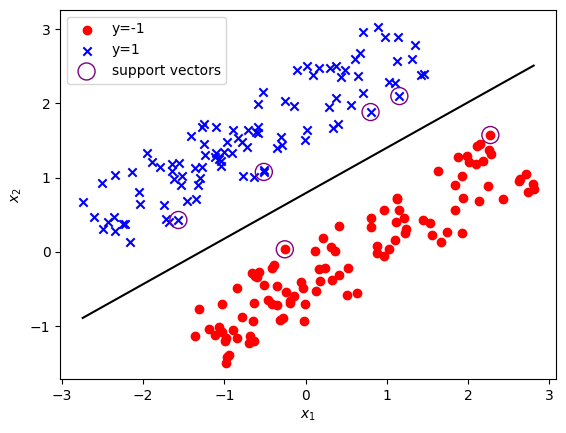

In [ ]:
# 用alpha计算w，b和支持向量
sup_idx = alpha > 1e-5 #支持向量(Support Vectors）= 那些对应 α ≠ 0 的训练样本
print('支持向量个数：', np.sum(sup_idx))
w = np.sum((alpha[sup_idx] * y[sup_idx]).reshape(-1, 1) * x[sup_idx], axis=0)
wx = x @ w.reshape(-1, 1)
b = -0.5 * (np.max(wx[y == -1]) + np.min(wx[y == 1]))
print('参数：', w, b)

# 绘图
X = np.linspace(np.min(x[:, 0]), np.max(x[:, 0]), 100)
Y = -(w[0] * X + b) / (w[1] + 1e-5)
plt.figure()
plt.scatter(x[y == -1, 0], x[y == -1, 1], color='red', label='y=-1')
plt.scatter(x[y == 1, 0], x[y == 1, 1], marker='x', color='blue', label='y=1')
plt.plot(X, Y, color='black')
# 用圆圈标记出支持向量
plt.scatter(x[sup_idx, 0], x[sup_idx, 1], marker='o', color='none', 
    edgecolor='purple', s=150, label='support vectors')
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')
plt.legend()
plt.show()

## 基于支持向量机的非线性分类问题

支持向量机（SVM）的核心思想是通过寻找一个超平面来最大化间隔，从而实现分类任务。然而，当数据在原始特征空间中不可分时，可以通过**核函数技巧**将数据映射到高维空间，使得数据变得

线性可分。

---

## 一、问题背景：非线性可分数据

在某些情况下，数据在原始特征空间中是非线性可分的，例如双螺旋数据集或复杂形状的数据分布。为了处理这种情况，可以引入非线性映射：

$$
\phi: \mathbb{R}^n \to \mathbb{R}^N
$$

将原始数据 $\mathbf{x}_i \in \mathbb{R}^n$ 映射到高维空间中的点 $\phi(\mathbf{x}_i) \in \mathbb{R}^N$，使得在高维空间中数据变得线性可分。

---

## 二、映射后的优化目标

在高维空间中，SVM 的对偶目标函数为：

$$
W(\boldsymbol{\alpha}) = \sum_{i=1}^m \alpha_i - \frac{1}{2} \sum_{i=1}^m \sum_{j=1}^m y_i y_j \alpha_i \alpha_j \phi(\mathbf{x}_i)^T \phi(\mathbf{x}_j)
$$

其中：
- $\alpha_i$ 是拉格朗日乘子；
- $y_i \in \{+1, -1\}$ 是样本标签；
- $\phi(\mathbf{x}_i)$ 是映射后的高维特征向量。

---

## 三、核函数技巧的引入

直接计算 $\phi(\mathbf{x}_i)^T \phi(\mathbf{x}_j)$ 的时间复杂度可能非常高，尤其是在高维空间中。为了简化计算，我们引入**核函数（Kernel Function）**：

$$
K(\mathbf{x}_i, \mathbf{x}_j) = \phi(\mathbf{x}_i)^T \phi(\mathbf{x}_j)
$$

核函数直接计算两个样本在高维空间中的内积，而无需显式地计算 $\phi(\mathbf{x}_i)$ 和 $\phi(\mathbf{x}_j)$。这样可以大大降低计算复杂度。

常见的核函数包括：
1. **线性核**：
   $$
   K(\mathbf{x}_i, \mathbf{x}_j) = \mathbf{x}_i^T \mathbf{x}_j
   $$
2. **多项式核**：
   $$
   K(\mathbf{x}_i, \mathbf{x}_j) = (\gamma \mathbf{x}_i^T \mathbf{x}_j + r)^d
   $$
3. **高斯核（径向基函数 RBF）**：
   $$
   K(\mathbf{x}_i, \mathbf{x}_j) = \exp\left(-\gamma \|\mathbf{x}_i - \mathbf{x}_j\|^2\right)
   $$
4. **Sigmoid 核**：
   $$
   K(\mathbf{x}_i, \mathbf{x}_j) = \tanh(\kappa \mathbf{x}_i^T \mathbf{x}_j + c)
   $$

---

## 四、核函数在预测中的应用

在训练完成后，SVM 的决策函数为：

$$
\hat{y} = \mathbf{w}^T \phi(\mathbf{x}) + b
$$

其中：
- $\mathbf{w} = \sum_{i=1}^m \alpha_i^* y_i \phi(\mathbf{x}_i)$ 是权重向量；
- $b$ 是偏置项。

由于 $\phi(\mathbf{x})$ 在高维空间中难以直接计算，我们可以利用核函数表示 $\mathbf{w}^T \phi(\mathbf{x})$：

$$
\mathbf{w}^T \phi(\mathbf{x}) = \sum_{i=1}^m \alpha_i^* y_i \phi(\mathbf{x}_i)^T \phi(\mathbf{x}) = \sum_{i=1}^m \alpha_i^* y_i K(\mathbf{x}_i, \mathbf{x})
$$

因此，最终的预测公式为：

$$
\hat{y} = \sum_{i=1}^m \alpha_i^* y_i K(\mathbf{x}_i, \mathbf{x}) + b
$$

---

## 五、偏置项 $b$ 的计算

偏置项 $b$ 可以通过支持向量计算得出。假设 $\alpha_i^* > 0$ 的样本是支持向量，则对于任意支持向量 $(\mathbf{x}_s, y_s)$，有：

$$
y_s = \mathbf{w}^T \phi(\mathbf{x}_s) + b
$$

代入 $\mathbf{w}^T \phi(\mathbf{x}_s)$ 的表达式：

$$
y_s = \sum_{i=1}^m \alpha_i^* y_i K(\mathbf{x}_i, \mathbf{x}_s) + b
$$

解得：

$$
b = y_s - \sum_{i=1}^m \alpha_i^* y_i K(\mathbf{x}_i, \mathbf{x}_s)
$$

通常取所有支持向量对应的 $b$ 值的平均值作为最终的偏置项：

$$
b = \frac{1}{|\mathcal{S}|} \sum_{s \in \mathcal{S}} \left( y_s - \sum_{i=1}^m \alpha_i^* y_i K(\mathbf{x}_i, \mathbf{x}_s) \right)
$$

其中 $\mathcal{S}$ 是支持向量集合。

---


### 数据集的读取与可视化

数据集大小: 194


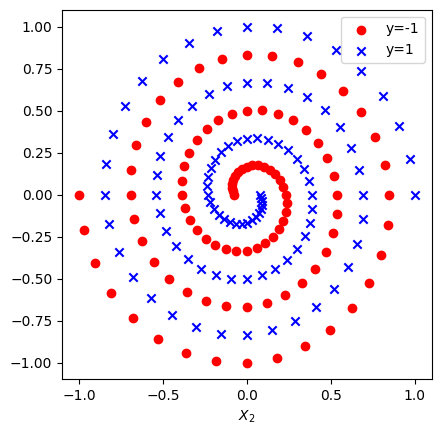

In [40]:
data=np.loadtxt('spiral.csv',delimiter=',')

print("数据集大小:",len(data))
x=data[:,:2]
y=data[:,2]

plt.figure()
plt.scatter(x[y==-1,0],x[y==-1,1],color='red',label='y=-1')
plt.scatter(x[y==1,0],x[y==1,1],color='blue',marker='x',label='y=1')
plt.xlabel('$X_1$')
plt.xlabel('$X_2$')
plt.legend()
plt.axis('square')
plt.show()

### 为什么要使用双重定义(**闭包**)：

####  场景：我们想定义一个“幂次函数”

  - 方法一：使用双重定义（闭包）：
  ``` python

  def power_function(n):
    def f(x):
        return x ** n
    return f
   
   ```
   - 使用方法

   ``` python
   square = power_function(2)   # 得到平方函数
   cube = power_function(3)     # 得到立方函数

   print(square(4))  # 输出 16
   print(cube(2))    # 输出 8

   ``` 

   - 方法二：不使用闭包，直接写成普通函数

   ``` python
   def power(x, n):
    return x ** n
   
   ```
   - 使用方法

   ``` python

   print(power(4, 2))  # 还是输出 16
   print(power(2, 3))  # 输出 8

   ```
   这样也能工作，但缺点是你每次都要传入 n，不能“先设定好”，也不能方便地做复用（比如直接给别人一个固定的平方函数）。





In [41]:
# 简单多项式核
def simple_poly_kernel(d):
    def k(x, y): 
        return np.inner(x, y) ** d
    return k

# RBF核
def rbf_kernel(sigma):
    def k(x, y):
        return np.exp(-np.inner(x - y, x - y) / (2.0 * sigma ** 2))
    return k

# 余弦相似度核
def cos_kernel(x, y):
    return np.inner(x, y) / np.linalg.norm(x, 2) / np.linalg.norm(y, 2)

# sigmoid核
def sigmoid_kernel(beta, c):
    def k(x, y):
        return np.tanh(beta * np.inner(x, y) + c)
    return k

核函数: Ploy(3)


100%|██████████| 500/500 [00:03<00:00, 149.70it/s]


核函数: RBG(0.1)


100%|██████████| 500/500 [00:03<00:00, 148.20it/s]


核函数: Cos


100%|██████████| 500/500 [00:03<00:00, 142.53it/s]


核函数: Sigmoid(1,-1)


100%|██████████| 500/500 [00:03<00:00, 150.99it/s]


<Figure size 640x480 with 0 Axes>

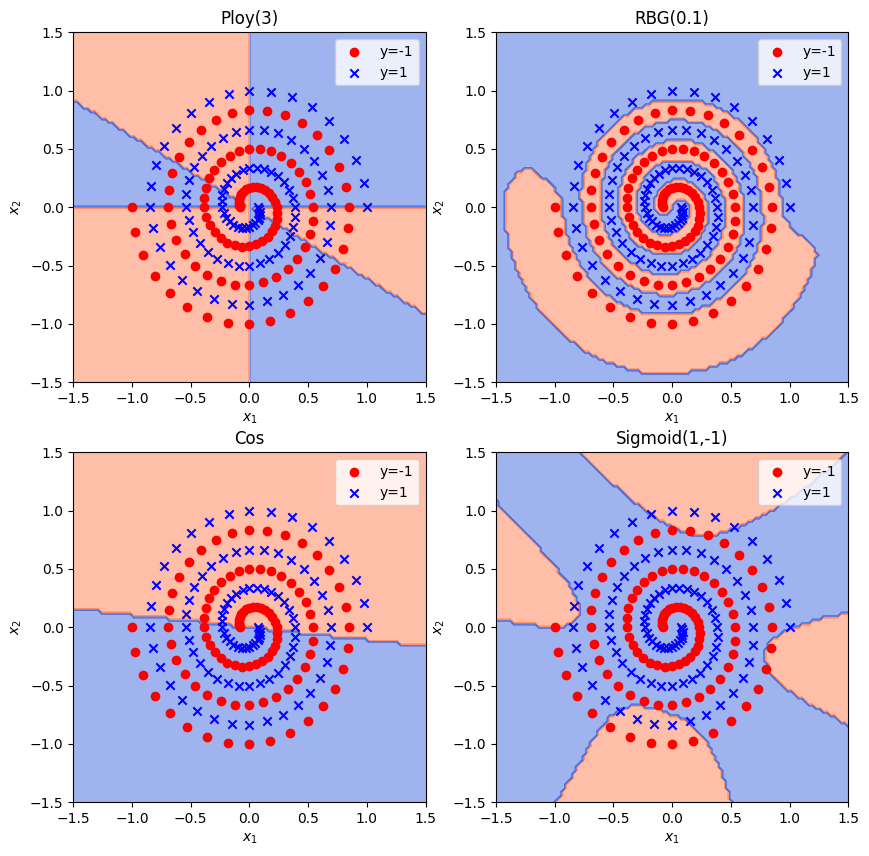

In [42]:
kernals=[
    simple_poly_kernel(3),
    rbf_kernel(0.1),
    cos_kernel,
    sigmoid_kernel(1,-1)
]
ker_names=['Ploy(3)','RBG(0.1)','Cos','Sigmoid(1,-1)']
C=1e8
max_iter=500

#绘制图像
plt.figure()
#创建一个 2x2 的子图网格（总共4个子图）
fig,axs=plt.subplots(2,2,figsize=(10,10))  #fig表示整个图像  axs是一个 2x2的子图对象数组，也就是你可以用axs[i][j]访问每一个子图
axs=axs.flatten()  #展平
cmap = ListedColormap(['coral', 'royalblue'])  #创建一个颜色映射（cmap） 第0类用 'coral'（珊瑚红） 第1类用 'royalblue'（皇家蓝）



#开始SVM
for i in range(len(ker_names)):
    print("核函数:",ker_names[i])
    alpha=SMO(x,y,ker=kernals[i],C=C,max_iter=max_iter)
    sup_idx=alpha>1e-5  #寻找支持向量
    sup_x=x[sup_idx]
    sup_y=y[sup_idx]
    sup_alpha=alpha[sup_idx]

    #用支持向量计算 W^T*x
    def wx(x_new):
        s=0
        for xi,yi,ai in zip(sup_x,sup_y,sup_alpha):
            s+=yi*ai*kernals[i](xi,x_new)
        return s
    #计算b*
    neg=[wx(xi) for xi in sup_x[sup_y==-1]]
    pos=[wx(xi) for xi in sup_x[sup_y==1]]
    b=-0.5*(np.max(neg)+np.min(pos))
    
    # 构造网格并用 SVM 预测分类
    G = np.linspace(-1.5, 1.5, 100)   
    G = np.meshgrid(G, G)  
    X = np.array([G[0].flatten(), G[1].flatten()]).T # 转换为每行一个向量的形式
    Y = np.array([wx(xi) + b for xi in X])
    Y[Y < 0] = -1
    Y[Y >= 0] = 1
    Y = Y.reshape(G[0].shape)
    axs[i].contourf(G[0], G[1], Y, cmap=cmap, alpha=0.5)
    # 绘制原数据集的点
    axs[i].scatter(x[y == -1, 0], x[y == -1, 1], color='red', label='y=-1')
    axs[i].scatter(x[y == 1, 0], x[y == 1, 1], marker='x', color='blue', label='y=1')
    axs[i].set_title(ker_names[i])
    axs[i].set_xlabel(r'$x_1$')
    axs[i].set_ylabel(r'$x_2$')
    axs[i].legend()

plt.show()


### 我们来逐行解析一下这个网格的构造方法

```python
G = np.linspace(-1.5, 1.5, 100)

G=[x1, x2, ..., x100]
```
- 创建一个从 -1.5 到 1.5 之间的 100 个等间距数值
- 用于构建网格坐标系（x 和 y 轴范围）



``` python
G = np.meshgrid(G, G)
```

- 创建一个二维坐标网格 G，表示一个二维平面上的坐标点（100x100）
- G[0] 是所有横坐标的组成（x 坐标）
- G[1] 是所有纵坐标的组成（y 坐标）

#### 示例：

``` python
G[0] =
[[x1, x2, ..., x100],
 [x1, x2, ..., x100],
 ...
]

G[1] =
[[y1, y1, ..., y1],
 [y2, y2, ..., y2],
 ...
]
```

``` python
X = np.array([G[0].flatten(), G[1].flatten()]).T  ## .T 是精髓
```

- 把二维坐标网格铺平成 N×2 的向量形式：

```python
X =
[[x1, y1],
 [x2, y2],
 ...
]
```

``` python
Y = np.array([wx(xi) + b for xi in X])
```

- 对每个点 xi，计算模型的输出 f(xi) = wx(xi) + b
- 结果是一个一维向量 Y，表示分类器在整个平面上的响应值（可以是正数或负数）


``` python
axs[i].contourf(G[0], G[1], Y, cmap=cmap, alpha=0.5)
```
- 使用 contourf（填充等高线）将平面区域根据 Y 的值（即类别）上色。
- 相当于画出分类边界图：
  - 红色代表 -1 类
  - 蓝色代表 +1 类（由 cmap 定义）
- alpha=0.5 设置透明度，防止图像太“糊”。



## Sklearn的SVM分类器

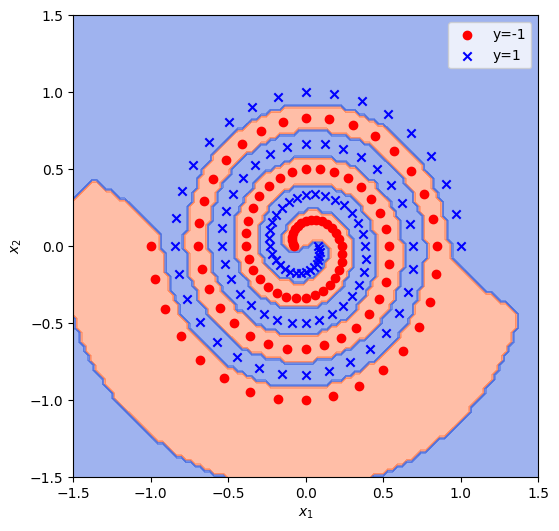

In [ ]:
#sklearn.svm导入SVM分类器
from sklearn.svm import SVC

#定义SVM模型，包括定义使用的核函数与参数信息
#kernel='rbf' 核函数类型
#gamma=50  RBF 核函数中的一个超参数
#tol=1e-6  优化容忍误差 
model=SVC(kernel='rbf',gamma=50,tol=1e-6)  
model.fit(x,y)

# 绘制结果
fig=plt.figure(figsize=(6,6))
G=np.linspace(-1.5,1.5,100)
G=np.meshgrid(G,G)
X=np.array([G[0].flatten(),G[1].flatten()]).T
Y=model.predict(X)
Y=Y.reshape(G[0].shape)
plt.contourf(G[0],G[1],Y,cmap=cmap,alpha=0.5)
# 绘制原数据集的点
plt.scatter(x[y == -1, 0], x[y == -1, 1], color='red', label='y=-1')
plt.scatter(x[y == 1, 0], x[y == 1, 1], marker='x', color='blue', label='y=1')
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')
plt.legend()
plt.show()